In [0]:
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
### Read one year data file
#decoded_metar_master = pd.read_csv('/content/drive/My Drive/decoded_metar_master.csv')

### Read all years data file
filename = '/content/drive/My Drive/decoded_metar_FINAL.csv'
decoded_metar_master = pd.read_csv(filename,dtype={'current_wx1':str})

In [4]:
decoded_metar_master

,date_time,station_id,latitude,longitude,elevation,date_time.1,wind_direction,wind_speed,current_wx1,air_temperature,dew_point_temperature,altimeter,present_weather,past_weather,past_weather2,eastward_wind,northward_wind,month,fzn_or_liq
0,2000-01-01 00:55:00,KMSN,43.13,-89.35,261,2000-01-01 00:55:00,320.0,6.0,-SN,-6.0,-9.0,29.92,71,0,0,3.856726,-4.596267,1,1
1,2000-01-01 01:00:00,KMSN,43.13,-89.35,261,2000-01-01 01:00:00,340.0,7.0,-SN,-5.0,-9.0,29.92,71,0,0,2.394141,-6.577848,1,1
2,2000-01-01 01:05:00,KMSN,43.13,-89.35,261,2000-01-01 01:05:00,330.0,10.0,-SN,-5.0,-10.0,29.92,71,0,0,5.000000,-8.660254,1,1
3,2000-01-01 01:10:00,KMSN,43.13,-89.35,261,2000-01-01 01:10:00,320.0,8.0,-SN,-6.0,-10.0,29.93,71,0,0,5.142301,-6.128356,1,1
4,2000-01-01 01:15:00,KMSN,43.13,-89.35,261,2000-01-01 01:15:00,320.0,8.0,-SN,-6.0,-10.0,29.93,71,0,0,5.142301,-6.128356,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178089,2020-03-30 00:25:00,KMSN,43.13,-89.35,261,2020-03-30 00:25:00,290.0,7.0,-RA,5.0,2.0,29.77,61,0,0,6.577848,-2.394141,3,0
178090,2020-03-30 00:30:00,KMSN,43.13,-89.35,261,2020-03-30 00:30:00,280.0,8.0,-RA,5.0,2.0,29.77,61,0,0,7.878462,-1.389185,3,0
178091,2020-03-31 16:55:00,KMSN,43.13,-89.35,261,2020-03-31 16:55:00,40.0,9.0,-SN,2.0,-1.0,30.08,71,0,0,-5.785088,-6.894400,3,1
178092,2020-03-31 17:00:00,KMSN,43.13,-89.35,261,2020-03-31 17:00:00,50.0,10.0,-SN,2.0,-1.0,30.08,71,0,0,-7.660444,-6.427876,3,1


In [0]:
### Split data 70/30 between training/testing
from sklearn.model_selection import train_test_split
#predictor_cols = ['air_temperature']
predictor_cols = ['air_temperature', 'wind_direction', 'wind_speed', 'dew_point_temperature', 'eastward_wind', 'northward_wind', 'altimeter', 'month']
target_cols = ['fzn_or_liq']
X = decoded_metar_master[predictor_cols]
Y = decoded_metar_master[target_cols]
training_predictor, test_predictor, training_target, test_target = train_test_split(X, Y, test_size=0.3)

In [0]:
##training_target = training_predictor
##test_target = test_predictor
##training_target.drop(['date_time', 'station_id',	'latitude',	'longitude',	'elevation',	'wind_direction',	'wind_speed',	'current_wx1',	'current_wx2',	'current_wx3',	'low_cloud_type',	'low_cloud_level',	'medium_cloud_type',	'medium_cloud_level',	'high_cloud_type',	'high_cloud_level',	'highest_cloud_type',	'highest_cloud_level',	'cloud_coverage',	'air_temperature',	'dew_point_temperature',	'altimeter',	'present_weather',	'past_weather',	'past_weather2',	'air_pressure_at_sea_level',	'eastward_wind',	'northward_wind'], axis=1)
##test_target.drop(['date_time', 'station_id',	'latitude',	'longitude',	'elevation',	'wind_direction',	'wind_speed',	'current_wx1',	'current_wx2',	'current_wx3',	'low_cloud_type',	'low_cloud_level',	'medium_cloud_type',	'medium_cloud_level',	'high_cloud_type',	'high_cloud_level',	'highest_cloud_type',	'highest_cloud_level',	'cloud_coverage',	'air_temperature',	'dew_point_temperature',	'altimeter',	'present_weather',	'past_weather',	'past_weather2',	'air_pressure_at_sea_level',	'eastward_wind',	'northward_wind'], axis=1)
##training_predictor.drop(['fzn_or_liq'], axis=1)
##test_predictor.drop(['fzn_or_liq'], axis=1)

In [0]:
from sklearn.linear_model import LogisticRegression


In [0]:
### put air_temperature values in an array
#training_predictor_array = training_predictor['air_temperature'].values
#test_predictor_array = test_predictor['air_temperature'].values

In [0]:
# Initiate the model using the default parameters
#logreg = LogisticRegression()

# Fit the model
#logreg.fit(training_predictor_array.reshape(-1,1), training_target['fzn_or_liq'])
#logreg.fit(training_predictor_array.reshape(-1,1), training_target['fzn_or_liq'])

# Predictions
#ptype_predict=logreg.predict(test_predictor_array.reshape(-1,1))
#predsprob = logreg.predict_proba(test_predictor_array.reshape(-1,1))

In [0]:
# Initiate the model using the default parameters
logreg = LogisticRegression()

# Fit the model
#logreg.fit(training_predictor_array.reshape(-1,1), training_target['fzn_or_liq'])
logreg.fit(training_predictor, training_target['fzn_or_liq'])

# Predictions
ptype_predict=logreg.predict(test_predictor)
predsprob = logreg.predict_proba(test_predictor)

In [0]:
#print(len(predsprob))
prob0 = []
prob1 = []
for i in range(len(predsprob)):
    prob0.append(predsprob[i][0])
    prob1.append(predsprob[i][1])

In [13]:
# Check skill with confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_target['fzn_or_liq'], ptype_predict)
cnf_matrix

array([[27302,   653],
       [  491, 24983]])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 257.44, 'Predicted label')

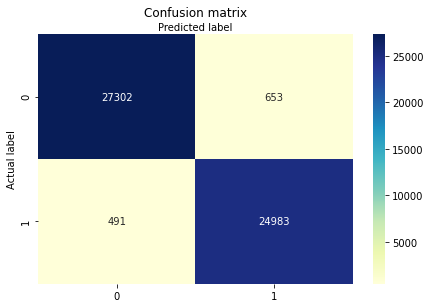

In [14]:
# Plot confusion matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [15]:
# Other performance metrics

#Jaccard Index, want this to be close to one
from sklearn.metrics import jaccard_score
j_index = jaccard_score(y_true=test_target['fzn_or_liq'],y_pred=ptype_predict)
round(j_index,2)
print('j_index:',j_index)

# F1-score
from sklearn.metrics import f1_score
f1 = f1_score(test_target['fzn_or_liq'], ptype_predict)
print('f1 score',f1)

# Brier skill score
##from sklearn.metrics import brier_score_loss
##log_score = brier_score_loss((test_target['fzn_or_liq'].values).reshape(-1,1), predsprob[:][0])
##print('Brier:',log_score)
from sklearn.metrics import brier_score_loss
brier_score = brier_score_loss(test_target['fzn_or_liq'],prob0)
print('Brier:',brier_score)

# Precision score
from sklearn.metrics import precision_score
precision_score = precision_score(test_target['fzn_or_liq'], ptype_predict)
print('precision score:', precision_score)

j_index: 0.9562138783633789
f1 score 0.9776169047153198
Brier: 0.9542492305552448
precision score: 0.9745280074894679
